#####     
# MNIST Classifier

In [16]:
import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [17]:
MNIST = pd.read_csv('MNIST.csv',header=0)
MNIST.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
MNIST.shape

(42000, 785)

In [19]:
MNIST.label.nunique()

10

In [20]:
sorted(MNIST.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
MNIST.isnull().sum().sum()

0

In [77]:
X = MNIST.drop('label',axis=1) / 255.0
X = X.values.reshape( X.shape[0], 28, 28 )

y = MNIST.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   
    tf.keras.layers.Dense(128,activation='relu'),   
    tf.keras.layers.Dropout(0.2),                   
    tf.keras.layers.Dense(10)                       
])
model.summary()

In [88]:
predictions = model(X_train).numpy()
predictions

array([[-1.7157454e+00, -8.4839916e+00,  7.7329837e-03, ...,
        -3.1449358e+00, -2.3815782e+00, -2.2311394e+00],
       [-8.0585279e-02, -5.2912326e+00, -5.3355503e+00, ...,
        -1.4488356e+01,  4.4985733e+00, -5.8587422e+00],
       [-1.1147112e+01, -4.0052509e+00, -3.9925275e+00, ...,
        -5.5944138e+00,  1.2444838e+00, -6.7212784e-01],
       ...,
       [-3.3485875e+00, -1.3959758e+01,  6.5602798e+00, ...,
        -4.5710020e+00, -8.0510788e+00,  1.5336061e+00],
       [-2.0395975e+00, -5.8507981e+00, -3.2469201e+00, ...,
        -4.8175421e+00, -3.6850688e+00, -6.4032354e+00],
       [ 1.2766705e+01, -9.1897802e+00, -4.4426155e+00, ...,
        -5.1895099e+00, -3.1498210e+00, -5.5258498e+00]], dtype=float32)

In [93]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(33600, 10), dtype=float32, numpy=
array([[1.5874094e-04, 1.8250586e-07, 8.8958180e-04, ..., 3.8018883e-05,
        8.1568251e-05, 9.4810428e-05],
       [1.5045930e-06, 8.2122842e-09, 7.8562694e-09, ..., 8.3215368e-13,
        1.4659610e-04, 4.6558313e-09],
       [6.5179990e-09, 8.2372972e-06, 8.3427694e-06, ..., 1.6812025e-06,
        1.5693348e-03, 2.3085628e-04],
       ...,
       [4.7073489e-05, 1.1598533e-09, 9.4654787e-01, ..., 1.3863992e-05,
        4.2708089e-07, 6.2099183e-03],
       [2.7718184e-05, 6.1317041e-07, 8.2876431e-06, ..., 1.7231329e-06,
        5.3474355e-06, 3.5290753e-07],
       [9.9978572e-01, 2.9129052e-10, 3.3573315e-08, ..., 1.5908233e-08,
        1.2230595e-07, 1.1364525e-08]], dtype=float32)>

In [82]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [83]:
loss_fn(y_train,predictions).numpy()

2.3454285

In [84]:
model.compile( optimizer = 'adam',
               loss      = loss_fn, 
               metrics   = ['accuracy']
             )
model.summary()

In [85]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3749 - accuracy: 0.8903
Epoch 2/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1796 - accuracy: 0.9474
Epoch 3/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1325 - accuracy: 0.9601
Epoch 4/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1077 - accuracy: 0.9674
Epoch 5/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0893 - accuracy: 0.9708


In [86]:
model.evaluate(X_test,y_test,verbose=2)

263/263 - 0s - loss: 0.1056 - accuracy: 0.9675 - 479ms/epoch - 2ms/step


[0.10563381016254425, 0.9674999713897705]

#####     

#####     

#####     

#####     
# Binary Classifier

In [189]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as npimg

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

from sklearn.model_selection import train_test_split

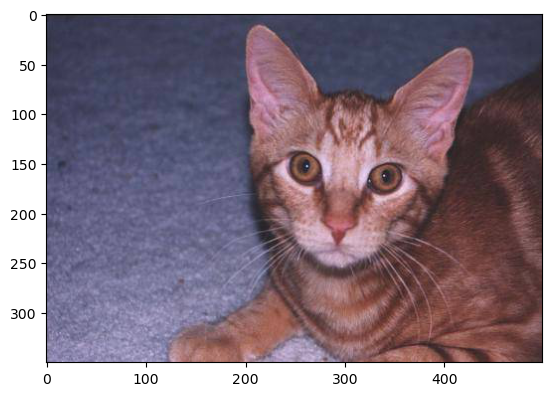

In [194]:
img = npimg.imread('catdog/Train_Set/cats/cat.107.jpg')
imgplot = plt.imshow(img)
plt.show()

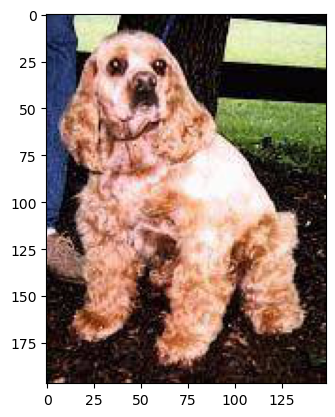

In [18]:
img = npimg.imread('catdog/Train_Set/dogs/dog.40.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
tf.__version__

'2.12.0'

In [232]:
img_width, img_height = 150, 150
train_data_dir  = 'catdog/Train_Set'
valid_data_dir  = 'catdog/Test_Set'
nb_train_sample = 20
nb_valid_sample = 20
epochs = 10
batch_size = 50

In [233]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [234]:
train_datagen = ImageDataGenerator(
    rescale         = 1./255., 
    shear_range     = 0.2, 
    zoom_range      = 0.2, 
    horizontal_flip = True 
    )

test_datagen = ImageDataGenerator( 
    rescale  = 1./255. 
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size = ( img_width, img_height ), 
    batch_size  =   batch_size, 
    class_mode  =  'binary', 
    classes     = ['cats','dogs']
    )

valid_generator = test_datagen.flow_from_directory( 
    valid_data_dir, 
    target_size = ( img_width, img_height ),
    batch_size  =   batch_size, 
    class_mode  =  'binary',
    classes     = ['cats','dogs']
    )

Found 6004 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


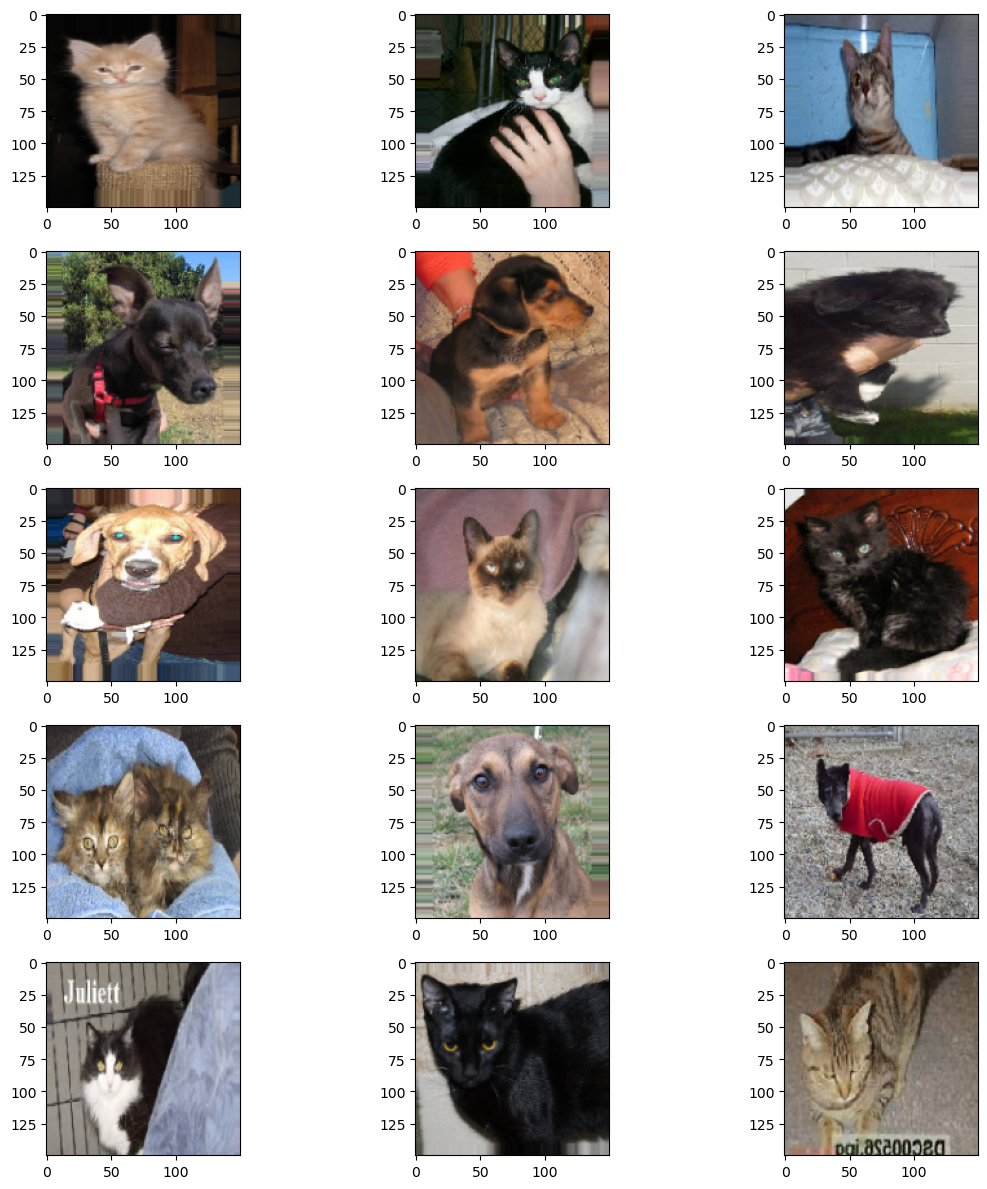

In [235]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_batch, y_batch in train_generator:
        image = x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [236]:
model = Sequential()

# Convolution Layr: Converts Images to an Array
model.add( Conv2D( 64, (3,3), input_shape=input_shape ) )    # 64 neurons  using 3x3 filter

# Relu Layer: egularization to Convert -ve numbers to 0
model.add( Activation( 'relu' )                         )     

# Pooling Layer: Reduces Input Image Size by Filter
model.add( MaxPooling2D( pool_size=(2,2) )              )    # Pooling reduces size of data

# Fully Connected Layer: Combines Features and Produces a Model
model.add( Flatten()                                    )    # Conversion of Multi-Dimensional Array to 1D Array
model.add( Dense( 64 )                                  )
model.add( Activation( 'relu' )                         )
model.add( Dense( 1 )                                   )    # Output Layer
model.add( Activation( 'sigmoid' )                      )

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 activation_44 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 350464)            0         
                                                                 
 dense_29 (Dense)            (None, 64)                22429760  
                                                                 
 activation_45 (Activation)  (None, 64)                0         
                                                     

In [237]:
model.compile( optimizer = 'rmsprop',
               loss      = 'binary_crossentropy', 
               metrics   = ['accuracy']
             )
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 activation_44 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 350464)            0         
                                                                 
 dense_29 (Dense)            (None, 64)                22429760  
                                                                 
 activation_45 (Activation)  (None, 64)                0         
                                                     

In [238]:
training = model.fit(
    train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, 
    validation_data=valid_generator, validation_steps=nb_valid_sample
                    )

Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 6.5598 - accuracy: 0.5290 - val_loss: 0.7029 - val_accuracy: 0.5640
Epoch 2/10
20/20 [==============================] - 42s 2s/step - loss: 0.7556 - accuracy: 0.5760 - val_loss: 0.6587 - val_accuracy: 0.6100
Epoch 3/10
20/20 [==============================] - 41s 2s/step - loss: 0.6767 - accuracy: 0.6170 - val_loss: 0.6508 - val_accuracy: 0.6330
Epoch 4/10
20/20 [==============================] - 41s 2s/step - loss: 0.6526 - accuracy: 0.6270 - val_loss: 0.7042 - val_accuracy: 0.5650
Epoch 5/10
20/20 [==============================] - 41s 2s/step - loss: 0.6512 - accuracy: 0.6130 - val_loss: 0.6273 - val_accuracy: 0.6490
Epoch 6/10
20/20 [==============================] - 41s 2s/step - loss: 0.6495 - accuracy: 0.6240 - val_loss: 0.6392 - val_accuracy: 0.6240
Epoch 7/10
20/20 [==============================] - 43s 2s/step - loss: 0.6377 - accuracy: 0.6310 - val_loss: 0.6298 - val_accuracy: 0.6450
Epoch 8/10
20/20 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


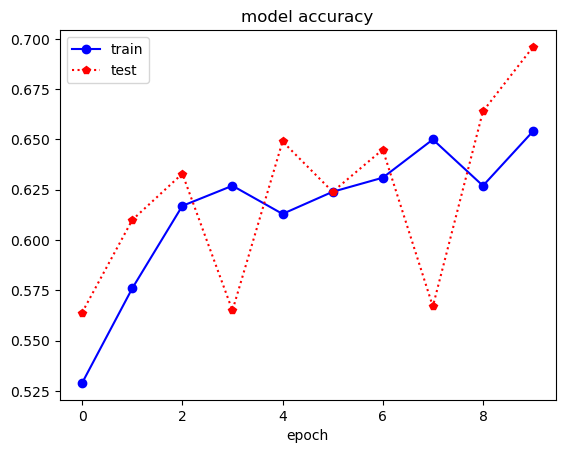

In [239]:
print(training.history.keys())
plt.plot(training.history['accuracy'],'b-o')
plt.plot(training.history['val_accuracy'],'r:p')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


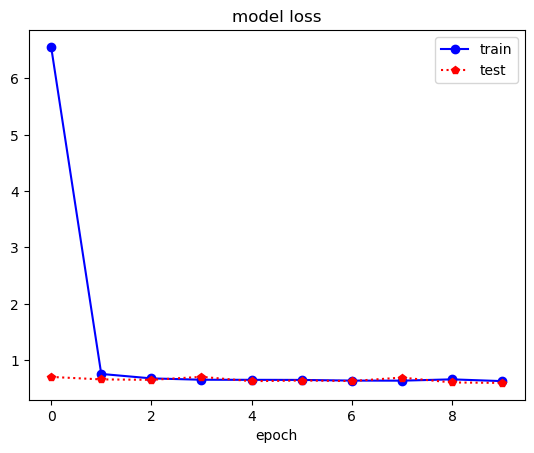

In [240]:
print(training.history.keys())
plt.plot(training.history['loss'],'b-o')
plt.plot(training.history['val_loss'],'r:p')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

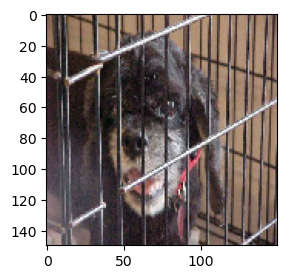

1/1 [==============================] - 0s 40ms/step
prediction = Dog


In [246]:
from tensorflow.keras.preprocessing import image

img = image.load_img('catdog/Test_Set/dogs/dog.3577.jpg',target_size=(150,150))
plt.figure(figsize=(3,3)); plt.imshow(img); plt.show()

img_pred = image.img_to_array(img)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
if rslt[0][0] == 1:
    prediction='Dog'
else:
    prediction='Cat'
print('prediction =',prediction)

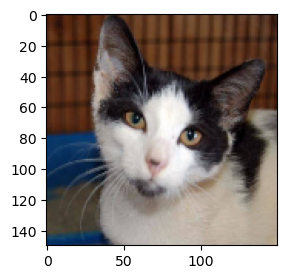

1/1 [==============================] - 0s 39ms/step
prediction = Cat


In [247]:
img = image.load_img('catdog/Test_Set/cats/cat.3533.jpg',target_size=(150,150))
plt.figure(figsize=(3,3)); plt.imshow(img); plt.show()

img_pred = image.img_to_array(img)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
if rslt[0][0] == 1:
    prediction='Dog'
else:
    prediction='Cat'
print('prediction =',prediction)

#####   

#####   